In [7]:
# from jupyterthemes import get_themes
# import jupyterthemes as jt
# from jupyterthemes.stylefx import set_nb_theme
# set_nb_theme('monokai')


In [1]:
# import the necessary libraries and packages 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

import seaborn as sn

In [2]:
#check the given data

df = pd.read_csv('kc_house_data.csv')
df.head(10)

df.date = pd.to_datetime(df.date)
print('Number of records: '+str(len(df)))
display(df.head())
display(df.info())

Number of records: 21597


id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0         NaN   0.0     ...          7        1180   
1      7242     2.0         0.0   0.0     ...          7        2170   
2     10000     1.0         0.0   0.0     ...          6         770   
3      5000     1.0         0.0   0.0     ...          7        1050   
4      8080     1.0         0.0   0.0     ...          8        1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11), object(1)
memory 

None

In [3]:
# check the column names

df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
# check the values of each column

df.describe().round()

id      price  bedrooms  bathrooms  sqft_living   sqft_lot  \
count  2.159700e+04    21597.0   21597.0    21597.0      21597.0    21597.0   
mean   4.580474e+09   540297.0       3.0        2.0       2080.0    15099.0   
std    2.876736e+09   367368.0       1.0        1.0        918.0    41413.0   
min    1.000102e+06    78000.0       1.0        0.0        370.0      520.0   
25%    2.123049e+09   322000.0       3.0        2.0       1430.0     5040.0   
50%    3.904930e+09   450000.0       3.0        2.0       1910.0     7618.0   
75%    7.308900e+09   645000.0       4.0        2.0       2550.0    10685.0   
max    9.900000e+09  7700000.0      33.0        8.0      13540.0  1651359.0   

        floors  waterfront     view  condition    grade  sqft_above  yr_built  \
count  21597.0     19221.0  21534.0    21597.0  21597.0     21597.0   21597.0   
mean       1.0         0.0      0.0        3.0      8.0      1789.0    1971.0   
std        1.0         0.0      1.0        1.0      1.0       828.0      29.0   
min        1.0         0.0      0.0        1.0      3.0       370.0    1900.0   
25%        1.0         0.0      0.0        3.0      7.0      1190.0    1951.0   
50%        2.0         0.0      0.0        3.0      7.0      1560.0    1975.0   
75%        2.0         0.0      0.0        4.0      8.0      2210.0    1997.0   
max        4.0         1.0      4.0        5.0     13.0      9410.0    2015.0   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
count       17755.0  21597.0  21597.0  21597.0        21597.0     21597.0  
mean           84.0  98078.0     48.0   -122.0         1987.0     12758.0  
std           400.0     54.0      0.0      0.0          685.0     27274.0  
min             0.0  98001.0     47.0   -123.0          399.0       651.0  
25%             0.0  98033.0     47.0   -122.0         1490.0      5100.0  
50%             0.0  98065.0     48.0   -122.0         1840.0      7620.0  
75%             0.0  98118.0     48.0   -122.0         2360.0     10083.0  
max          2015.0  98199.0     48.0   -121.0         6210.0    871200.0

In [5]:
df.waterfront.unique()

array([nan,  0.,  1.])

In [6]:
# top 75%
price75= df['price'].quantile(0.75)

# make a dataframe with the quantile
expensive = df[(df['price'] >= price75)]
expensive.head()

id       date      price  bedrooms  bathrooms  sqft_living  \
5   7237550310 2014-05-12  1230000.0         4       4.50         5420   
10  1736800520 2015-04-03   662500.0         3       2.50         3560   
15  9297300055 2015-01-24   650000.0         4       3.00         2950   
21  2524049179 2014-08-26  2000000.0         3       2.75         3050   
26  1794500383 2014-06-26   937000.0         3       1.75         2450   

    sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
5     101930     1.0         0.0   0.0     ...         11        3890   
10      9796     1.0         NaN   0.0     ...          8        1860   
15      5000     2.0         0.0   3.0     ...          9        1980   
21     44867     1.0         0.0   4.0     ...          9        2330   
26      2691     2.0         0.0   0.0     ...          8        1750   

    sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
5          1530.0     2001           0.0    98053  47.6561 -122.005   
10         1700.0     1965           0.0    98007  47.6007 -122.145   
15          970.0     1979           0.0    98126  47.5714 -122.375   
21          720.0     1968           0.0    98040  47.5316 -122.233   
26          700.0     1915           NaN    98119  47.6386 -122.360   

    sqft_living15  sqft_lot15  
5            4760      101930  
10           2210        8925  
15           2140        4000  
21           4110       20336  
26           1760        3573  

[5 rows x 21 columns]

In [7]:
# top 75%
price75= df['price'].quantile(0.75)

# make a dataframe with the quantile
expensive = df[(df['price'] >= price75)]
expensive.head()

# make a dataframe with the quantile
expensive = df[(df['price'] >= price75)]
expensive.head()

id       date      price  bedrooms  bathrooms  sqft_living  \
5   7237550310 2014-05-12  1230000.0         4       4.50         5420   
10  1736800520 2015-04-03   662500.0         3       2.50         3560   
15  9297300055 2015-01-24   650000.0         4       3.00         2950   
21  2524049179 2014-08-26  2000000.0         3       2.75         3050   
26  1794500383 2014-06-26   937000.0         3       1.75         2450   

    sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
5     101930     1.0         0.0   0.0     ...         11        3890   
10      9796     1.0         NaN   0.0     ...          8        1860   
15      5000     2.0         0.0   3.0     ...          9        1980   
21     44867     1.0         0.0   4.0     ...          9        2330   
26      2691     2.0         0.0   0.0     ...          8        1750   

    sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
5          1530.0     2001           0.0    98053  47.6561 -122.005   
10         1700.0     1965           0.0    98007  47.6007 -122.145   
15          970.0     1979           0.0    98126  47.5714 -122.375   
21          720.0     1968           0.0    98040  47.5316 -122.233   
26          700.0     1915           NaN    98119  47.6386 -122.360   

    sqft_living15  sqft_lot15  
5            4760      101930  
10           2210        8925  
15           2140        4000  
21           4110       20336  
26           1760        3573  

[5 rows x 21 columns]

In [8]:
# check if we have credible data (not other city for example)
df = pd.read_csv('kc_house_data.csv')
df.head()

waterfront = df[(df['waterfront'] == 1)]
len(waterfront)
waterfront_map = folium.Map(location=[47.6561, -122.005],
                        zoom_start=13,
                        tiles='openstreetmap')

#folium.CircleMarker(location=[47.6561, -122.005], color = 'teal', fill=True).add_to(waterfront_map)

for i in waterfront.index:
    lat = waterfront.lat[i]
    long = waterfront.long[i]
    marker = folium.Marker([lat, long]).add_to(waterfront_map)

waterfront_map


In [10]:
# check if we have credible data (not other city for example)
df = pd.read_csv('kc_house_data.csv')
df.head()

waterfront = df[(df['waterfront'] == 1)]
len(waterfront)
waterfront_map = folium.Map(location=[47.6561, -122.005],
                        zoom_start=13,
                        tiles='openstreetmap')

for i in waterfront.index:
    lat = waterfront.lat[i]
    long = waterfront.long[i]
    price = waterfront.price[i]
    sqft_living = waterfront.sqft_living[i]
    marker = folium.Marker([lat, long]).add_to(waterfront_map)
    popup_text = "Price: {}, Sqft: {}".format(price,sqft_living)
    popup = folium.Popup(popup_text, parse_html=True)
    marker = folium.Marker([lat, long], popup=popup).add_to(waterfront_map)

waterfront_map

In [11]:
# top 25% expensive house cluster map
df = pd.read_csv('kc_house_data.csv')
expensive = df[(df['price'] >= price75)]

# define the latitude and longitude
lat=float(np.sum(df.lat.tolist())/len(df.lat))
long=float(np.sum(df.long.tolist())/len(df.long))

# make a basic map
expensive_map = folium.Map(location=[lat, long], zoom_start=6, tiles='Stamen Terrain')

# make cluster markers using folium plugins
marker_cluster = folium.plugins.MarkerCluster().add_to(expensive_map)

for i in expensive.index:
    lat = df.lat[i]
    long = df.long[i]
    marker = folium.Marker([lat, long]).add_to(marker_cluster)

# call the map    
expensive_map

# Look at the houses by year of built

In [12]:
# check the year built 
# df['yr_built'].value_counts().sort_index(ascending=False)

unique = df['yr_built'].unique()
sorted_unique = sorted(unique)
sorted_unique


[1900,
 1901,
 1902,
 1903,
 1904,
 1905,
 1906,
 1907,
 1908,
 1909,
 1910,
 1911,
 1912,
 1913,
 1914,
 1915,
 1916,
 1917,
 1918,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

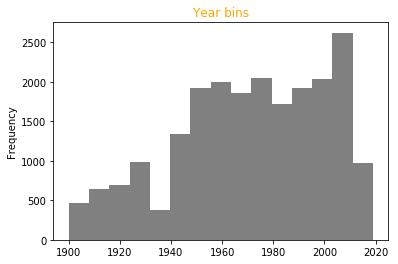

In [13]:
# year built frequency barplot
df['yr_built'].plot.hist(range=(1900, 2019), bins=15, color='gray')
plt.title('Year bins', color = 'orange')
plt.show()

In [14]:
# make new column for year_built with 3 bins
# 1 between 1900 and 1940
# 2 between 1940 and 1980
# 3 after 1980

df['year_bins'] = df.yr_built.map(lambda x: 1 if x >= 1900 and x <= 1940
                            else (2 if x > 1940 and x <= 1980
                                 else 3))
df.head(5)

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view    ...      sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0    ...            1180            0.0   
1      7242     2.0         0.0   0.0    ...            2170          400.0   
2     10000     1.0         0.0   0.0    ...             770            0.0   
3      5000     1.0         0.0   0.0    ...            1050          910.0   
4      8080     1.0         0.0   0.0    ...            1680            0.0   

   yr_built yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955          0.0    98178  47.5112 -122.257           1340   
1      1951       1991.0    98125  47.7210 -122.319           1690   
2      1933          NaN    98028  47.7379 -122.233           2720   
3      1965          0.0    98136  47.5208 -122.393           1360   
4      1987          0.0    98074  47.6168 -122.045           1800   

   sqft_lot15  year_bins  
0        5650          2  
1        7639          2  
2        8062          1  
3        5000          2  
4        7503          3  

[5 rows x 22 columns]

Text(0, 0.5, 'Longitude')

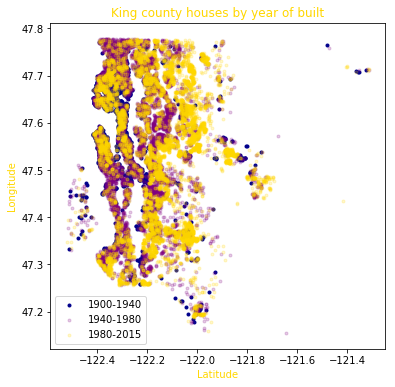

In [15]:
# houses by year of built

lat1 = df.loc[df['year_bins'] == 1].lat
long1 = df.loc[df['year_bins'] == 1].long

lat2 = df.loc[df['year_bins'] == 2].lat
long2 = df.loc[df['year_bins'] == 2].long

lat3 = df.loc[df['year_bins'] == 3].lat
long3 = df.loc[df['year_bins'] == 3].long

all_houses = plt.figure(figsize=(6,6))

plt.scatter(long1, lat1, label = '1900-1940', color='darkblue', marker='.')
plt.scatter(long2, lat2, label = '1940-1980', color='purple', marker='.', alpha=0.2)
plt.scatter(long3, lat3, label = '1980-2015', color='gold', marker='.', alpha=0.2)

plt.title('King county houses by year of built', color = 'gold')
plt.legend()

plt.xlabel('Latitude', color = 'gold')
plt.ylabel('Longitude', color = 'gold')

# Look at house sales by date


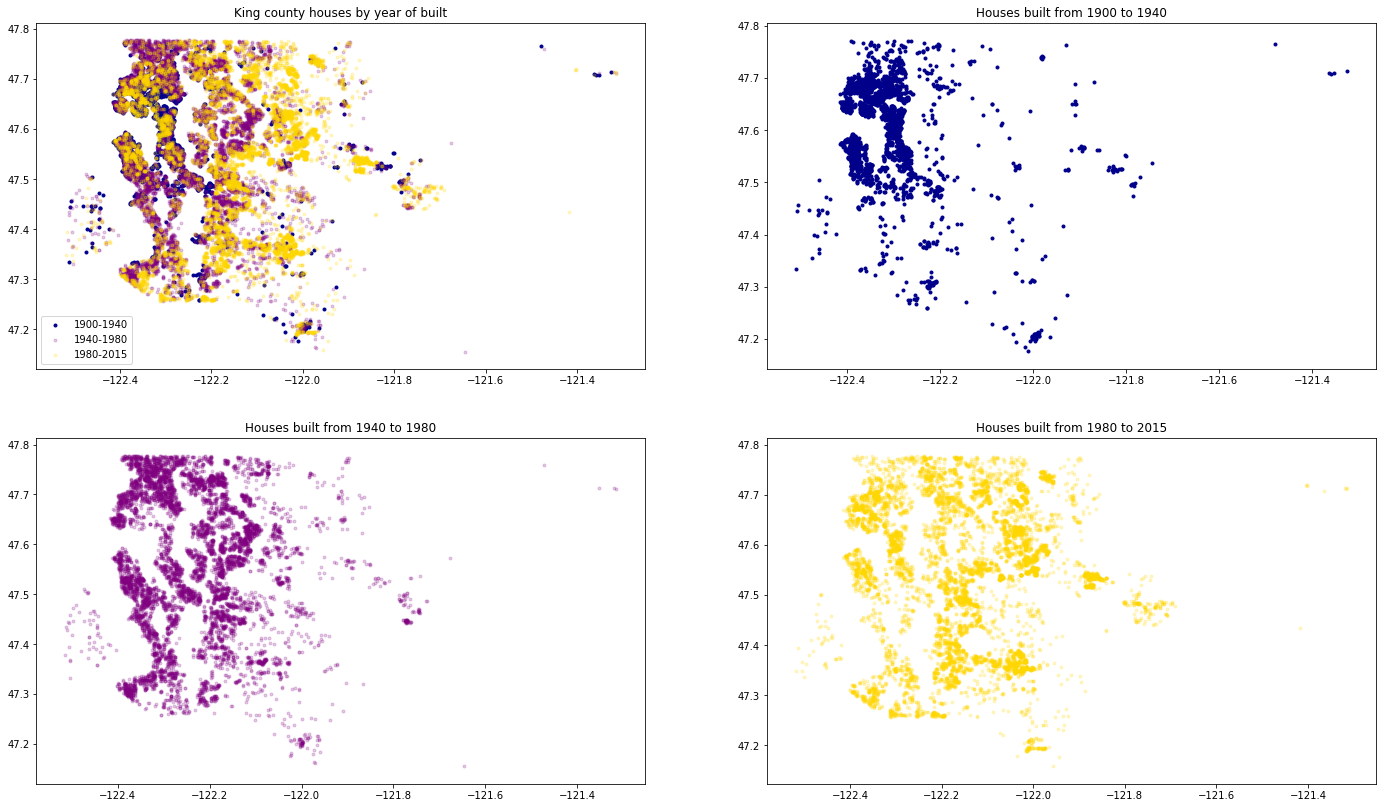

In [16]:
fig = plt.figure(figsize = (24,14))
ax1 = fig.add_subplot(221)

plt.scatter(long1, lat1, label = '1900-1940', color='darkblue', marker='.')
plt.scatter(long2, lat2, label = '1940-1980', color='purple', marker='.', alpha=0.2)
plt.scatter(long3, lat3, label = '1980-2015', color='gold', marker='.', alpha=0.2)

plt.title('King county houses by year of built')
plt.legend()

ax2 = fig.add_subplot(222)
plt.scatter(long1, lat1, label = '1900-1940', color='darkblue', marker='.')
plt.title('Houses built from 1900 to 1940')

ax3 = fig.add_subplot(223)
plt.scatter(long2, lat2, label = '1940-1980', color='purple', marker='.', alpha=0.2)
plt.title('Houses built from 1940 to 1980')

ax4 = fig.add_subplot(224)
plt.scatter(long3, lat3, label = '1980-2015', color='gold', marker='.', alpha=0.2)
plt.title('Houses built from 1980 to 2015')
plt.show()

In [17]:
!pip install descartes

In [18]:
!pip install geopandas

In [19]:
# import necessary packages

import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

# create basemap

basemap = gpd.read_file('tl_2017_53033_roads.shp')

fig, ax = plt.subplots(figsize=(20,15))
basemap.plot(ax = ax)

DriverError: tl_2017_53033_roads.shp: No such file or directory

In [ ]:
basemap = gpd.read_file('tl_2017_53033_roads.shp')

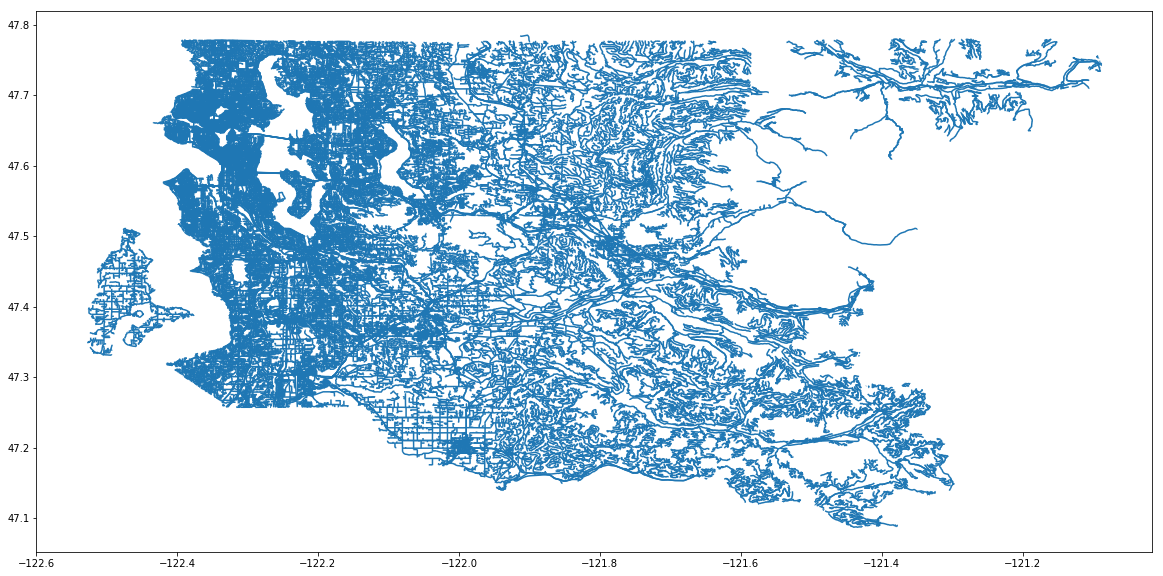

In [18]:
fig, ax = plt.subplots(figsize=(20,15))
basemap.plot(ax = ax)

In [19]:
df = pd.read_csv('kc_house_data.csv')
crs= {'init' : 'epsg:4326'}
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0         NaN   0.0     ...          7        1180   
1      7242     2.0         0.0   0.0     ...          7        2170   
2     10000     1.0         0.0   0.0     ...          6         770   
3      5000     1.0         0.0   0.0     ...          7        1050   
4      8080     1.0         0.0   0.0     ...          8        1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [20]:
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
geometry[:3]

In [21]:
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
geo_df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view            ...             sqft_above  \
0      5650     1.0         NaN   0.0            ...                   1180   
1      7242     2.0         0.0   0.0            ...                   2170   
2     10000     1.0         0.0   0.0            ...                    770   
3      5000     1.0         0.0   0.0            ...                   1050   
4      8080     1.0         0.0   0.0            ...                   1680   

   sqft_basement  yr_built yr_renovated  zipcode      lat     long  \
0            0.0      1955          0.0    98178  47.5112 -122.257   
1          400.0      1951       1991.0    98125  47.7210 -122.319   
2            0.0      1933          NaN    98028  47.7379 -122.233   
3          910.0      1965          0.0    98136  47.5208 -122.393   
4            0.0      1987          0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15                  geometry  
0           1340        5650  POINT (-122.257 47.5112)  
1           1690        7639   POINT (-122.319 47.721)  
2           2720        8062  POINT (-122.233 47.7379)  
3           1360        5000  POINT (-122.393 47.5208)  
4           1800        7503  POINT (-122.045 47.6168)  

[5 rows x 22 columns]

In [22]:
# make new column for year_built in 3 columns
# 1 between 1900 and 1940
# 2 between 1940 and 1980
# 3 after 1980

df['year_bins'] = df.yr_built.map(lambda x: 1 if x >= 1900 and x <= 1940
                            else (2 if x > 1940 and x <= 1980
                                 else 3))
df.head(5)

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view    ...      sqft_basement  yr_built  \
0      5650     1.0         NaN   0.0    ...                0.0      1955   
1      7242     2.0         0.0   0.0    ...              400.0      1951   
2     10000     1.0         0.0   0.0    ...                0.0      1933   
3      5000     1.0         0.0   0.0    ...              910.0      1965   
4      8080     1.0         0.0   0.0    ...                0.0      1987   

   yr_renovated zipcode      lat     long  sqft_living15  sqft_lot15  \
0           0.0   98178  47.5112 -122.257           1340        5650   
1        1991.0   98125  47.7210 -122.319           1690        7639   
2           NaN   98028  47.7379 -122.233           2720        8062   
3           0.0   98136  47.5208 -122.393           1360        5000   
4           0.0   98074  47.6168 -122.045           1800        7503   

                   geometry  year_bins  
0  POINT (-122.257 47.5112)          2  
1   POINT (-122.319 47.721)          2  
2  POINT (-122.233 47.7379)          1  
3  POINT (-122.393 47.5208)          2  
4  POINT (-122.045 47.6168)          3  

[5 rows x 23 columns]

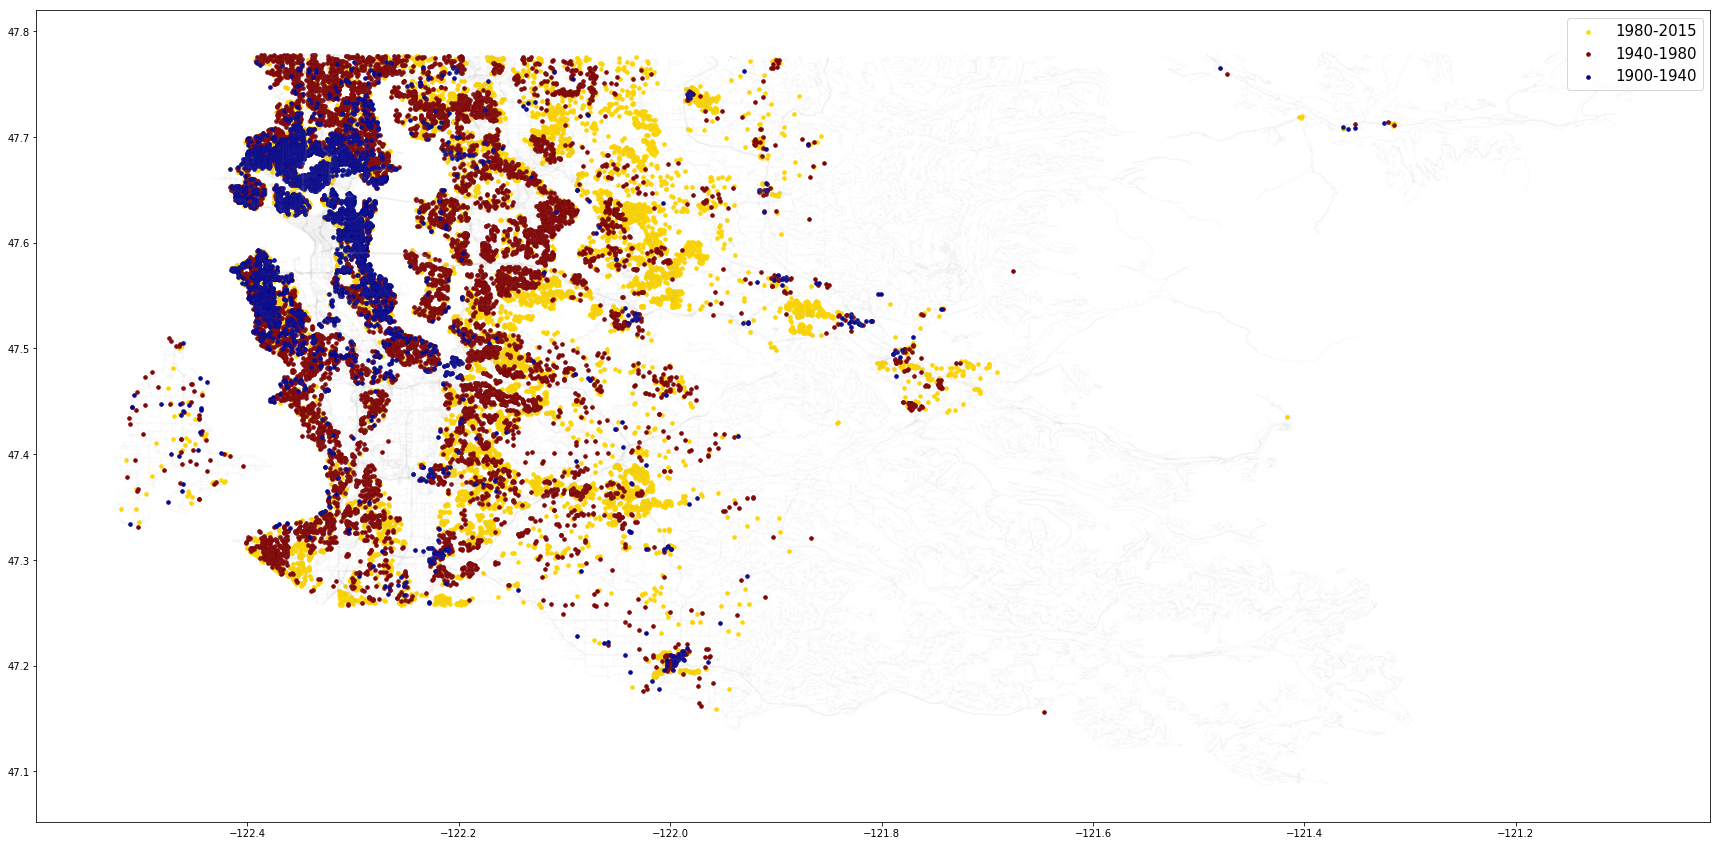

In [26]:
fig, ax = plt.subplots(figsize=(30,15))
basemap.plot(ax = ax, alpha = 0.05, color = 'darkgrey')

geo_df[geo_df['year_bins'] == 3].plot(ax=ax, markersize = 50, color = 'gold', marker = '.', label = '1980-2015')
geo_df[geo_df['year_bins'] == 2].plot(ax=ax, markersize = 50, color = 'maroon', marker = '.', label = '1940-1980')
geo_df[geo_df['year_bins'] == 1].plot(ax=ax, markersize = 50, color = 'darkblue', marker = '.', label = '1900-1940')

plt.legend(prop={'size':15})
